In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use('fivethirtyeight')

%matplotlib inline

In [51]:
sector_name = {'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2024-08-01'
end = '2024-11-08'

# Price = web.get_data_yahoo(Symbol,start=start,end=end)
Price = yf.download(Symbol, start=start, end=end)
# Price = Price['Adj Close'].rename(sector_name, axis='columns')
Price = Price['Adj Close'].rename(columns=sector_name)

#Price.rename(columns=sector_name, inplace=True)
daily_returns = Price.pct_change().dropna()

[*********************100%***********************]  9 of 9 completed


In [53]:
daily_returns  # เรียกดูตัวอย่างข้อมูล

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2024-08-02 00:00:00+00:00,-0.018851,-0.025788,-0.024583,-0.021994,-0.028105,0.008782,0.001619,-0.001985,-0.036798
2024-08-05 00:00:00+00:00,-0.022323,-0.022059,-0.029006,-0.017355,-0.033314,-0.019682,-0.026408,-0.026714,-0.028270
2024-08-06 00:00:00+00:00,0.005112,0.006131,0.016161,0.012023,0.013593,0.006950,0.008442,0.004631,0.011041
2024-08-07 00:00:00+00:00,-0.013562,0.004024,0.001205,-0.004834,-0.016202,0.001022,0.005626,-0.010169,-0.017450
2024-08-08 00:00:00+00:00,0.015467,0.021527,0.016125,0.023053,0.037347,0.009065,0.001092,0.022122,0.021817
...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,-0.002784,-0.006321,0.003442,0.001345,0.007514,0.000374,-0.022275,0.005924,0.016253
2024-11-04 00:00:00+00:00,0.004402,0.017494,-0.007719,-0.001119,-0.000759,0.002745,-0.011903,-0.006566,-0.003448
2024-11-05 00:00:00+00:00,0.001497,0.006699,0.009291,0.016734,0.014079,0.006346,0.015026,0.007358,0.017703


Text(0.5, 1.0, 'Sector Correlation')

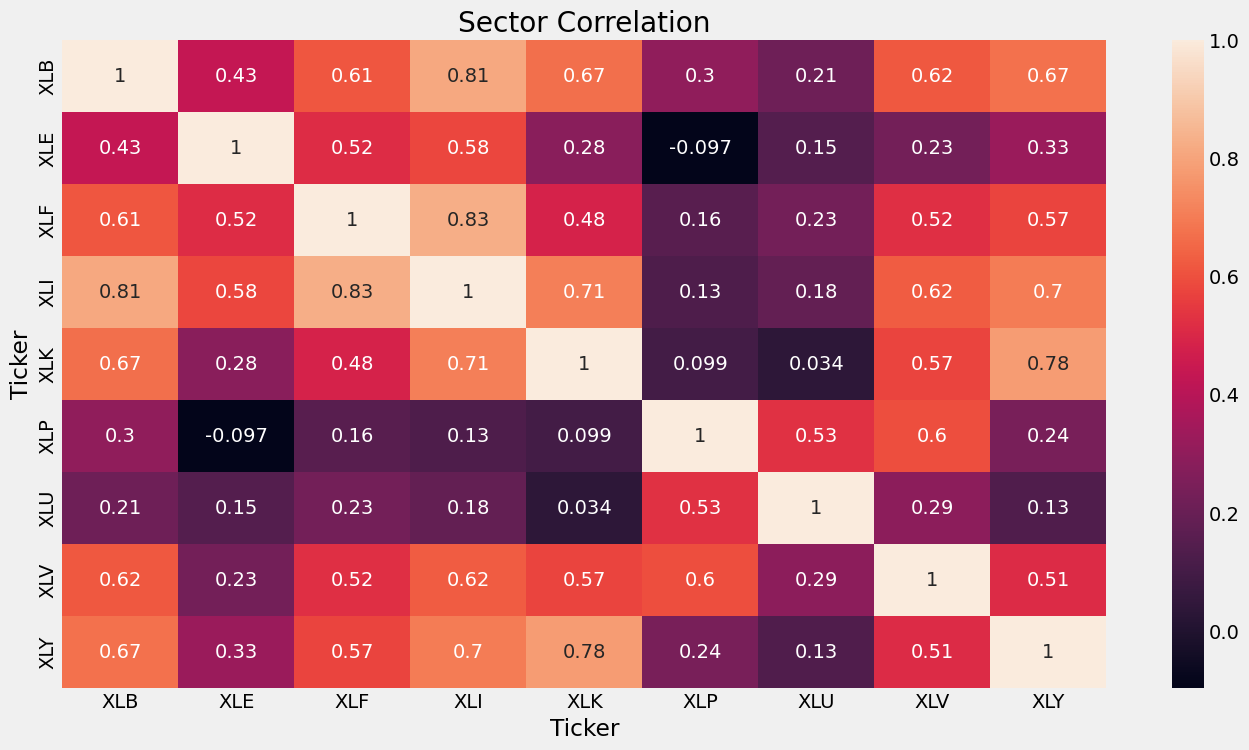

In [55]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("Sector Correlation")

Text(0.5, 1.0, 'In the three months leading up to the 2024 U.S. election, Ranking Performance')

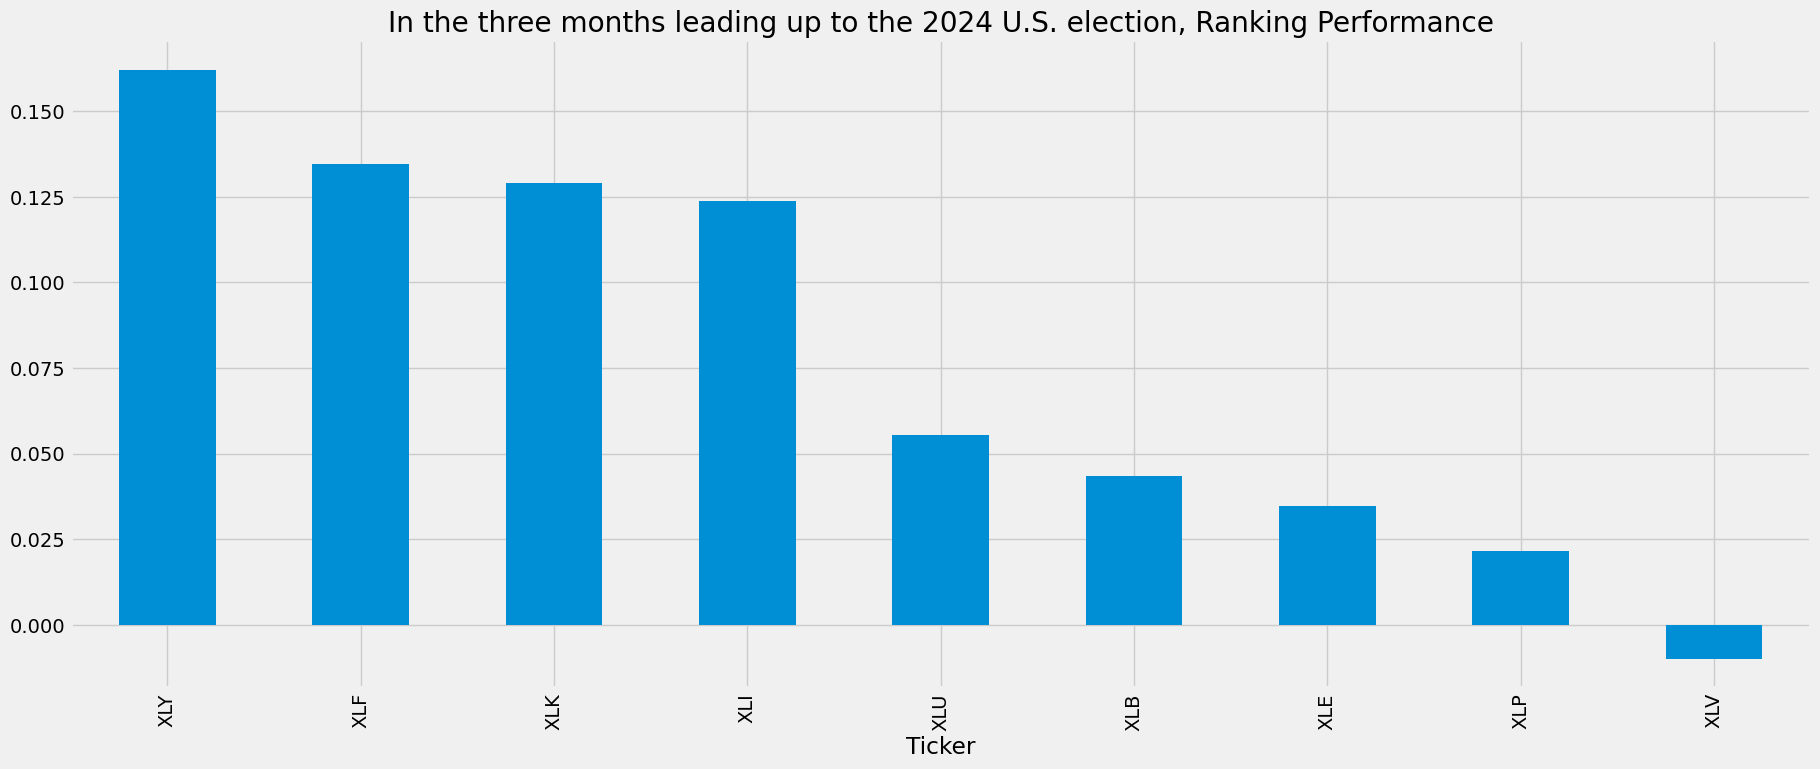

In [61]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("In the three months leading up to the 2024 U.S. election, Ranking Performance")

C:\Users\Lenovo T490s\AppData\Local\Temp\ipykernel_10312\1355151637.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  etf_return = Price.apply(lambda x: x / x[0])


<Axes: title={'center': 'Sector Returns'}, xlabel='Date'>

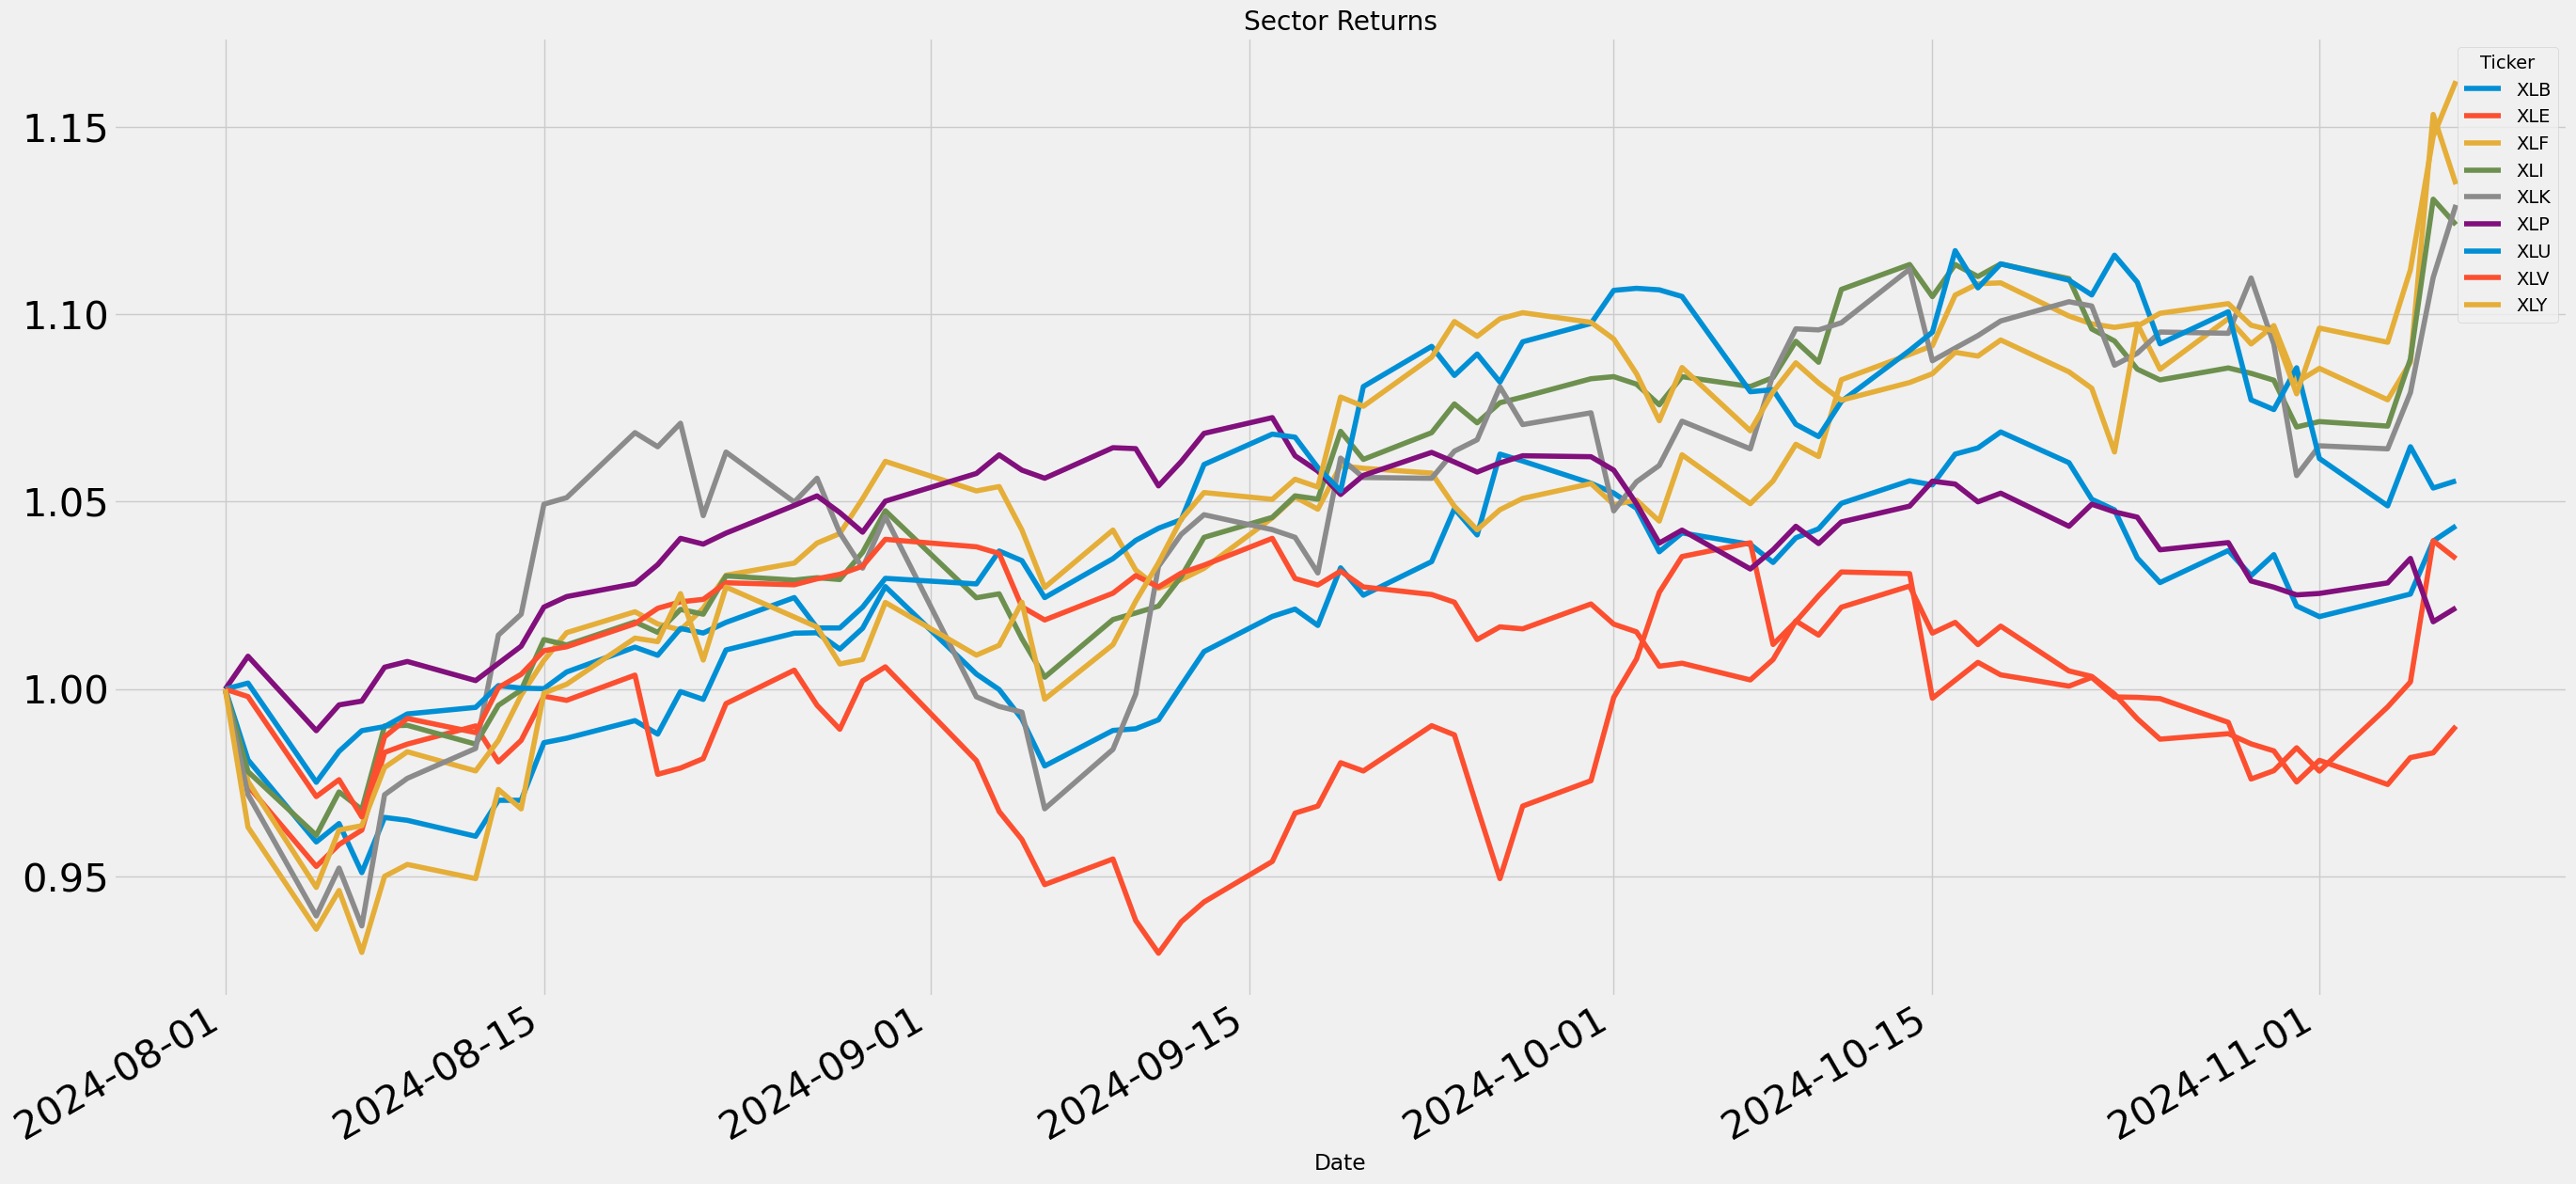

In [59]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15), title="Sector Returns", fontsize=30)